# Neural Network for Prediction using TensorFlow 2.0 (Objected-Oriented)
## CPE 490 590 
### Author: Rahul Bhadani

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 15

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard
import datetime


## Read the data

In [17]:
df = pd.read_csv('Dataset/Concrete_Compressive_Strength/Concrete_Data.csv')
df.shape

(1030, 9)

In [18]:
y = df[['Concrete compressive strength(MPa, megapascals) ']]
x = df.drop('Concrete compressive strength(MPa, megapascals) ', axis=1)


## Split the Dataset into Training and Testing

In [19]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size = 1/3, random_state = 0)


# Model Class for Neural Network

In [20]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class NeuralNetwork(Model):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = Dense(5, activation='relu')
        self.layer2 = Dense(2, activation='relu')
        self.output_layer = Dense(1)

    def call(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return self.output_layer(x)

neuralnet_model = NeuralNetwork()

# Training

In [21]:
neuralnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

history = neuralnet_model.fit(X_Train, Y_Train, epochs=1000, validation_data=(X_Test, Y_Test), 
                    verbose=1, callbacks=[tensorboard_callback])


Epoch 1/1000
22/22 [==============================] - 0s 4ms/step - loss: 1295.4196 - val_loss: 1051.1177
Epoch 2/1000
22/22 [==============================] - 0s 2ms/step - loss: 847.7650 - val_loss: 589.0982
Epoch 3/1000
22/22 [==============================] - 0s 2ms/step - loss: 565.3326 - val_loss: 457.2762
Epoch 4/1000
22/22 [==============================] - 0s 2ms/step - loss: 468.2208 - val_loss: 389.6709
Epoch 5/1000
22/22 [==============================] - 0s 2ms/step - loss: 402.7932 - val_loss: 344.3177
Epoch 6/1000
22/22 [==============================] - 0s 2ms/step - loss: 357.4197 - val_loss: 309.9032
Epoch 7/1000
22/22 [==============================] - 0s 2ms/step - loss: 328.0818 - val_loss: 288.4779
Epoch 8/1000
22/22 [==============================] - 0s 2ms/step - loss: 307.2912 - val_loss: 272.9387
Epoch 9/1000
22/22 [==============================] - 0s 2ms/step - loss: 294.8496 - val_loss: 262.3999
Epoch 10/1000
22/22 [==============================] - 0s 2ms/

# Plot training & validation loss values


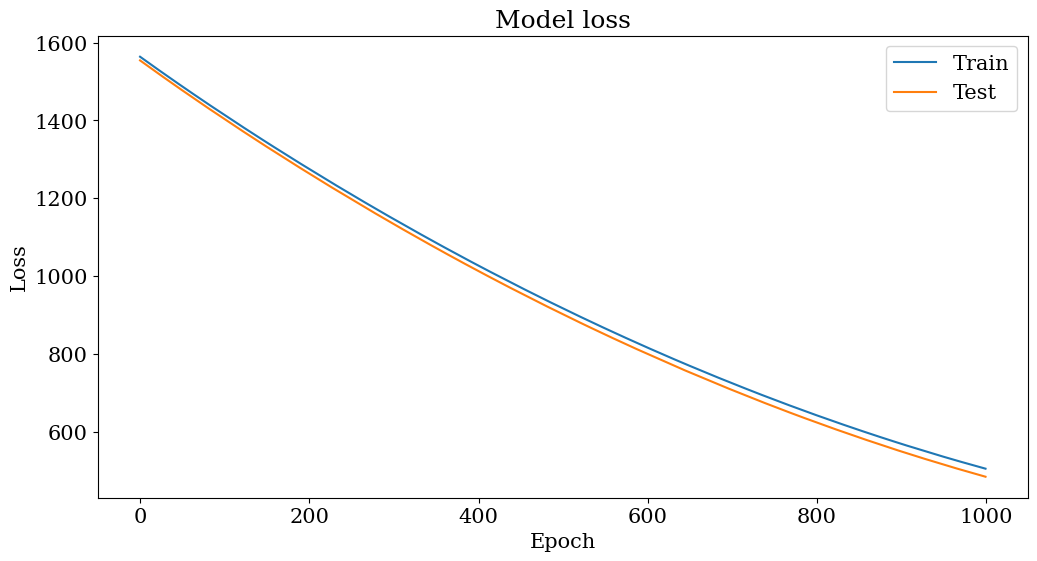

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.savefig('figures/hw05_Q2_3.pdf', format='pdf', bbox_inches='tight')

plt.show()

# Mean Squared Error on the Test Data

In [ ]:
test_loss = neuralnet_model.evaluate(X_Test, Y_Test, verbose=1)

print(f"Mean Squared Error on Test Data: {test_loss}")

11/11 [==============================] - 0s 762us/step - loss: 484.2780
Mean Squared Error on Test Data: 484.2779846191406


# Save The Final Model Weights

In [ ]:
neuralnet_model.save_weights('model_weights.h5')

# Local The Final Model Weights from Saved `.h5` File

In [ ]:
# Create a new instance of the same model
new_model = NeuralNetwork()

# Call the model on some data (this could be a batch of your actual data or dummy data)
dummy_data = tf.zeros((1, 8))  # Assuming the input shape is (None, 8)
new_model(dummy_data)

# Load the previously saved weights
new_model.load_weights('model_weights.h5')

# Save the entire model to the TensorFlow SavedModel format


In [ ]:
neuralnet_model.save('mymodel', save_format='tf')


INFO:tensorflow:Assets written to: mymodel/assets


INFO:tensorflow:Assets written to: mymodel/assets


# Load the entire model from the TensorFlow SavedModel format


In [ ]:
loaded_model = tf.keras.models.load_model('mymodel')
